In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate

Using TensorFlow backend.


# 輸入、輸出資料整理

In [2]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

print("共有 %d 筆大小為 %d*%d 的訓練資料。" %X_train.shape)
print("共有 %d 筆大小為 %d*%d 的測試資料。\n" %X_test.shape)

x_train = X_train.reshape(60000, -1)
x_test = X_test.reshape(10000, -1)

x_train = (x_train-x_train.min())/x_train.max()
x_test = (x_test-x_test.min())/x_test.max()
print('x_train 標準化後的最大值為 %g、最小值為 %g。' %(x_train.max(),x_train.min()))
print('x_test 標準化後的最大值為 %g、最小值為 %g。' %(x_test.max(),x_test.min()))

y_train = np_utils.to_categorical(Y_train,10) 
y_test = np_utils.to_categorical(Y_test,10)

共有 60000 筆大小為 28*28 的訓練資料。
共有 10000 筆大小為 28*28 的測試資料。

x_train 標準化後的最大值為 1、最小值為 0。
x_test 標準化後的最大值為 1、最小值為 0。


# 利用 Functional API 建構 NN 
* 3 層 hidden layers
* activation function 使用 relu、loss function 使用 MSE、optimizer 使用 Adam
* 第 2、3 層 hidden layers 具有分支，如下所示

$$\mathbb{ R }^{ 784 }\overset { { f }_{ 1 } }{ \longrightarrow  } \mathbb{ R }^{ 520 }\begin{Bmatrix} \overset { { f }_{ 2 } }{ \longrightarrow  } \mathbb{ R }^{ 250 }\begin{Bmatrix} \overset { { f }_{ 4 } }{ \longrightarrow  } \mathbb{ R }^{ 100 } \\ \overset { { f }_{ 5 } }{ \longrightarrow  } \mathbb{ R }^{ 200 } \end{Bmatrix} \\ \overset { { f }_{ 3 } }{ \longrightarrow  } \mathbb{ R }^{ 250 }\begin{Bmatrix} \overset { { f }_{ 6 } }{ \longrightarrow  } \mathbb{ R }^{ 300 } \\ \overset { { f }_{ 7 } }{ \longrightarrow  } \mathbb{ R }^{ 400 } \\ \overset { { f }_{ 8 } }{ \longrightarrow  } \mathbb{ R }^{ 500 } \end{Bmatrix} \end{Bmatrix}\overset {\rm direct }{ \underset {\rm sum }{ \longrightarrow  }  } \mathbb{ R }^{ 1500 }\overset { { f }_{ 9 } }{ \longrightarrow  } \mathbb{ R }^{ 10 }$$

$$x\overset { { f }_{ 1 } }{ \longmapsto  } { z }_{ 1 }\begin{Bmatrix} \overset { { f }_{ 2 } }{ \longmapsto  } { z }_{ 2 }\begin{Bmatrix} \overset { { f }_{ 4 } }{ \longmapsto  } { z }_{ 4 } \\ \overset { { f }_{ 5 } }{ \longmapsto  } { z }_{ 5 } \end{Bmatrix} \\ \overset { { f }_{ 3 } }{ \longmapsto  } { z }_{ 3 }\begin{Bmatrix} \overset { { f }_{ 6 } }{ \longmapsto  } { z }_{ 6 } \\ \overset { { f }_{ 7 } }{ \longmapsto  } { z }_{ 7 } \\ \overset { { f }_{ 8 } }{ \longmapsto  } { z }_{ 8 } \end{Bmatrix} \end{Bmatrix}\overset {\rm direct }{ \underset {\rm sum }{ \longmapsto  }  } { z }_{ 9 }\overset { { f }_{ 9 } }{ \longmapsto  } { y }$$

In [3]:
f1 = Dense(520, activation='relu')
f2 = Dense(250, activation='relu')
f3 = Dense(250, activation='relu')
f4 = Dense(100, activation='relu')
f5 = Dense(200, activation='relu')
f6 = Dense(300, activation='relu')
f7 = Dense(400, activation='relu')
f8 = Dense(500, activation='relu')
f9 = Dense(10, activation='softmax')

x = Input(shape=(784,))
z1 = f1(x)
z2 = f2(z1)
z3 = f3(z1)
z4 = f4(z2)
z5 = f5(z2)
z6 = f6(z3)
z7 = f7(z3)
z8 = f8(z3)
z9 = concatenate([z4,z5,z6,z7,z8])
y = f9(z9)

model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 520)          408200      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 250)          130250      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 250)          130250      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (D

In [4]:
model.compile(loss='mse', optimizer=Adam(), metrics=['acc'])
model.fit(x_train, y_train, batch_size=200, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.0119 - acc: 0.9197
Epoch 2/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0047 - acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.0037 - acc: 0.9768
Epoch 4/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.0030 - acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.0023 - acc: 0.9859
Epoch 6/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.0021 - acc: 0.9871
Epoch 7/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.0019 - acc: 0.9886
Epoch 8/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.0018 - acc: 0.9890
Epoch 9/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.0016 - acc: 0.9900
Epoch 10/20
60000/60000 [==============================] - 14s 231us/step - loss: 

In [11]:
predict = np.argmax(model.predict(x_test), axis=1)
score = model.evaluate(x_test, y_test)
print('testing data 的正確率：', score[1])

10000/10000 [==============================] - 1s 126us/step
testing data 的正確率： 0.9804


# 看看哪些字寫得很醜

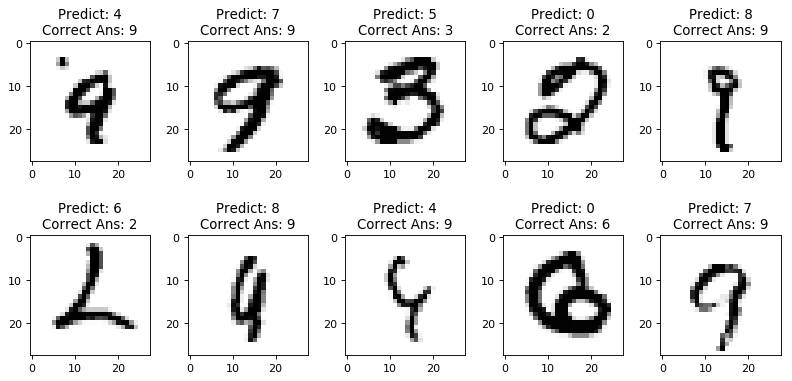

In [12]:
fail_img = X_test[predict!=Y_test]
fail_predict = predict[predict!=Y_test]
correct_ans = Y_test[predict!=Y_test]

idx = np.random.choice(range(fail_predict.size), size=10, replace=False) #隨機選10個預測錯誤的例子

plt.figure(figsize=(10,5), dpi=80)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(fail_img[idx[i]], cmap='Greys')
    plt.title('Predict: %d\nCorrect Ans: %d' %(fail_predict[idx[i]], correct_ans[idx[i]]))
    
plt.tight_layout()
plt.show()